In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.misc import derivative
from scipy.stats import norm

In [16]:
zi5, zi6, zi7, zi8 = 0.40, 3, 0.59, 4

In [17]:
def survival_function(y):
  return zi5 * np.exp(-zi6 * y**2) + zi7 * np.exp(-zi8 * y**8)

def pdf_function(y):
  return -derivative(survival_function, y, dx=1e-5)

Probility of 2 to 4 hours:

In [18]:
P_Y_greater_2, _ = quad(survival_function, 2, np.inf)
P_Y_greater_4, _ = quad(survival_function, 4, np.inf)
P_between_2_and_4 = P_Y_greater_2 - P_Y_greater_4

In [19]:
print(f"P(2 ≤ Y ≤ 4) = {P_between_2_and_4:.8f}")

P(2 ≤ Y ≤ 4) = 0.00000020


PDF Diagram:

In [20]:
y_values = np.linspace(0, 5, 1000)
pdf_values = [pdf_function(y) for y in y_values]

<ipython-input-17-aeb018903e1e>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return -derivative(survival_function, y, dx=1e-5)


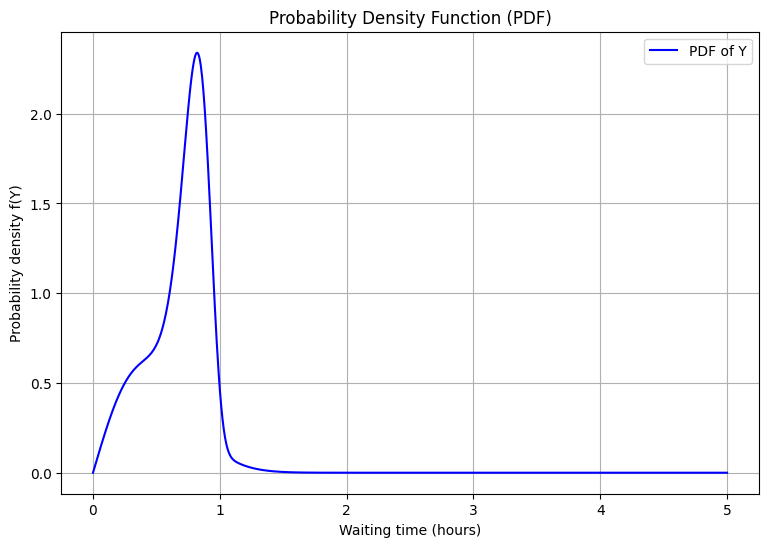

In [21]:
plt.figure(figsize=(9, 6))
plt.plot(y_values, pdf_values, label='PDF of Y', color='blue')
plt.xlabel("Waiting time (hours)")
plt.ylabel("Probability density f(Y)")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.grid()
plt.show()

Histogram's plot for the number of owl calls heard per minute:

In [22]:
y_minutes = np.arange(0, 5, 1/60)  # From 0 to 5 hours in one minute increments
pdf_minutes = [pdf_function(y) for y in y_minutes]

<ipython-input-17-aeb018903e1e>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return -derivative(survival_function, y, dx=1e-5)


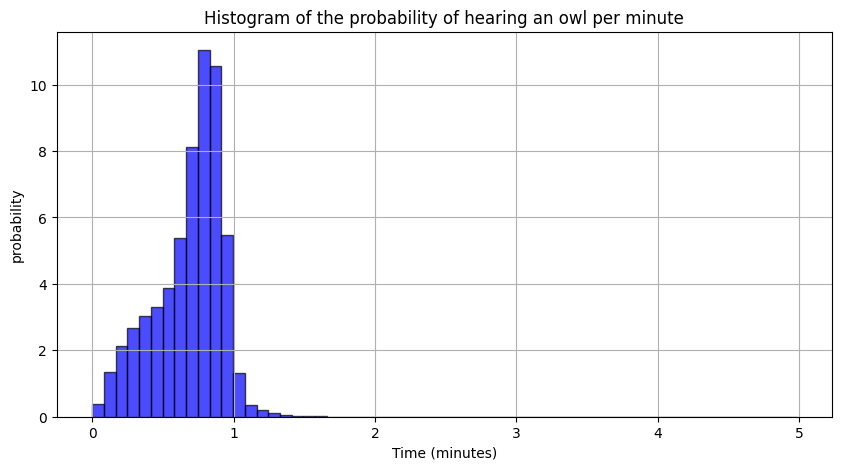

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(y_minutes, bins=60, weights=pdf_minutes, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Time (minutes)")
plt.ylabel("probability")
plt.title("Histogram of the probability of hearing an owl per minute")
plt.grid()
plt.show()

Expected Value E[Y] :

In [24]:
expected_value, _ = quad(lambda y: y * pdf_function(y), 0, np.inf)
print(f" Expected Value (E[Y]) = {expected_value:.6f}")

 Expected Value (E[Y]) = 0.671891


<ipython-input-17-aeb018903e1e>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return -derivative(survival_function, y, dx=1e-5)


Variance:

In [25]:
expected_value_sq, _ = quad(lambda y: y**2 * pdf_function(y), 0, np.inf)
variance = expected_value_sq - expected_value**2
print(f"Variance (Var(Y)) = {variance:.6f}")

Variance (Var(Y)) = 0.060040


<ipython-input-17-aeb018903e1e>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return -derivative(survival_function, y, dx=1e-5)


Quarter:

In [26]:
Q1 = norm.ppf(0.25, loc=expected_value, scale=np.sqrt(variance))
Q2 = norm.ppf(0.50, loc=expected_value, scale=np.sqrt(variance))  # Mean
Q3 = norm.ppf(0.75, loc=expected_value, scale=np.sqrt(variance))

In [28]:
print(f"firstQuarter(Q1) = {Q1:.6f}")
print(f"median(Q2) = {Q2:.6f}")
print(f"thirdQuarter (Q3) = {Q3:.6f}")

firstQuarter(Q1) = 0.506620
median(Q2) = 0.671891
thirdQuarter (Q3) = 0.837162
